# Example C: low birth wight data 

#%<http://www.umass.edu/statdata/statdata/data/lowbwt.txt>

### read data 

in data1 <- read.table("http://www2.isye.gatech.edu/~ymei/7406/Handouts/lowbwt.csv", head=T, sep=",")


In [1]:
## read the data from given URL
import pandas as pd
import numpy as np


url = "http://www2.isye.gatech.edu/~ymei/7406/Handouts/lowbwt.csv"
data1 = pd.read_csv(url)

data1.head()

,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
0,4,1,28,120,3,1,1,0,1,0,709
1,10,1,29,130,1,0,0,0,1,2,1021
2,11,1,34,187,2,1,0,1,0,0,1135
3,13,1,25,105,3,0,1,1,0,0,1330
4,15,1,25,85,3,0,0,0,1,0,1474


## fit a logit model with LOW as the dep. var. and AGE, LWT, and SMOKE as the covariates

logit.out <- glm(LOW~AGE+LWT+SMOKE, family=binomial(link=logit),
                 data=data1)

reference: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html

https://www.bayesianmodelsforastrophysicaldata.com/code-5-2



In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We can use an R-like formula string to separate the predictors from the response.

In [4]:
formula = 'LOW ~ AGE + LWT + SMOKE'

The glm() function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

In [5]:
model = smf.glm(formula = formula, data = data1, family = sm.families.Binomial())
result = model.fit()

print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    LOW   No. Observations:                  189
Model:                            GLM   Df Residuals:                      185
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -111.44
Date:                Sat, 28 Dec 2019   Deviance:                       222.88
Time:                        22:37:23   Pearson chi2:                     186.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3682      1.014      1.349      0.1

In [6]:
print("Coefficeients")
print(result.params)
print()
print("p-Values")
print(result.pvalues)
print()
print("Dependent variables")
print(result.model.endog_names)

Coefficeients
Intercept    1.368225
AGE         -0.038995
LWT         -0.012139
SMOKE        0.670764
dtype: float64

p-Values
Intercept    0.177341
AGE          0.233440
LWT          0.047859
SMOKE        0.039559
dtype: float64

Dependent variables
LOW


In [82]:
predictions = result.predict()
print(predictions[13:45])

[0.3028636  0.48684767 0.36315791 0.13257628 0.31467452 0.33160588
 0.28313085 0.33470755 0.35187602 0.48464863 0.40249509 0.22395531
 0.44968849 0.45077801 0.40205682 0.22051994 0.57150985 0.51020894
 0.29293202 0.32414941 0.24412761 0.50046172 0.44777461 0.33972606
 0.30769151 0.39939793 0.36541602 0.24456847 0.44477502 0.45724767
 0.35146044 0.27184632]


In [93]:
# X =data1.loc[14:45, [ "AGE", "LWT", "SMOKE"]]
# X = sm.add_constant(X)
# manu_pred = np.dot(X, result.params.values)
# manu_pred

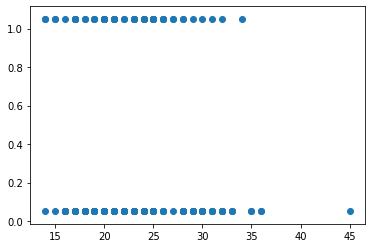

In [101]:
# plot low on AGE adding some jitter (noise) to LOW
import matplotlib.pyplot as plt
from random import random
rnd_state = np.random.RandomState()
# plt.scatter(range(len(predictions)), predictions)
plt.scatter(data1["AGE"], data1["LOW"]+0.1*rnd_state.normal(0, 1))

In [96]:
X1 = np.hstack((np.ones((32, 1)), np.arange(14, 46)[:, np.newaxis], np.ones((32,1)) * 120, np.ones((32,1))))
X1 = pd.DataFrame(X1)

# X = sm.add_constant(X)
Xb1 = np.dot(X1, result.params.values)
Xb1

array([ 0.03643977, -0.00255481, -0.0415494 , -0.08054398, -0.11953856,
       -0.15853314, -0.19752773, -0.23652231, -0.27551689, -0.31451147,
       -0.35350606, -0.39250064, -0.43149522, -0.47048981, -0.50948439,
       -0.54847897, -0.58747355, -0.62646814, -0.66546272, -0.7044573 ,
       -0.74345188, -0.78244647, -0.82144105, -0.86043563, -0.89943022,
       -0.9384248 , -0.97741938, -1.01641396, -1.05540855, -1.09440313,
       -1.13339771, -1.17239229])

In [98]:
prob1 = np.exp(Xb1)/(1+np.exp(Xb1))
prob1

array([0.50910893, 0.4993613 , 0.48961415, 0.47987488, 0.4701509 ,
       0.46044951, 0.45077801, 0.44114355, 0.43155321, 0.42201392,
       0.41253247, 0.40311547, 0.39376934, 0.38450032, 0.3753144 ,
       0.36621737, 0.35721475, 0.34831181, 0.33951356, 0.33082473,
       0.32224977, 0.31379286, 0.30545785, 0.29724834, 0.2891676 ,
       0.28121864, 0.27340413, 0.26572651, 0.25818786, 0.25079005,
       0.24353461, 0.23642284])

In [117]:
V = result.cov_params()
V

,Intercept,AGE,LWT,SMOKE
Intercept,1.028727,-0.020679,-0.004074,-0.054326
AGE,-0.020679,0.001071,-0.000029,-0.000006
LWT,-0.004074,-0.000029,0.000038,0.000055
SMOKE,-0.054326,-0.000006,0.000055,0.106196


In [142]:
Var_logit1 = np.diag(np.dot(np.dot(X1,V), X1.T))
Var_logit1

array([0.13755449, 0.12031192, 0.10521134, 0.09225275, 0.08143617,
       0.07276157, 0.06622898, 0.06183838, 0.05958978, 0.05948318,
       0.06151857, 0.06569596, 0.07201535, 0.08047673, 0.09108011,
       0.10382548, 0.11871285, 0.13574222, 0.15491359, 0.17622695,
       0.19968231, 0.22527966, 0.25301901, 0.28290036, 0.3149237 ,
       0.34908905, 0.38539638, 0.42384572, 0.46443705, 0.50717038,
       0.5520457 , 0.59906302])

In [143]:
Xb1_upper = Xb1 + 1.96*np.sqrt(Var_logit1)
Xb1_low = Xb1 - 1.96*np.sqrt(Var_logit1)

In [147]:
# Now use the logistic cdf to transform these CI into probabilities
prob1_upper = np.exp(Xb1_upper)/(1+np.exp(Xb1_upper))
prob1_low = np.exp(Xb1_low)/(1+np.exp(Xb1_low))

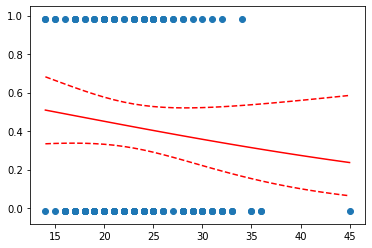

In [152]:
plt.scatter(data1["AGE"], data1["LOW"]+0.1*rnd_state.normal(0, 1))

xx = np.linspace(14, 45, 32)
plt.plot(xx, prob1, color = 'red');

plt.plot(xx, prob1_upper, color = 'red', linestyle='dashed');
plt.plot(xx, prob1_low, color = 'red', linestyle='dashed');



In [12]:
# print(np.column_stack((data1.as_matrix(columns = ["LOW"]).flatten(), 
#                        result.model.endog)))

In [38]:
predictions_nominal = [ 1 if x < 0.3 else 0 for x in predictions]
# predictions_nominal 

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(data1["LOW"], 
                       predictions_nominal))

[[54 76]
 [40 19]]


In [30]:
print(classification_report(data1["LOW"], 
                            predictions_nominal, 
                            digits = 3))

              precision    recall  f1-score   support

           0      0.538     0.054     0.098       130
           1      0.301     0.898     0.451        59

    accuracy                          0.317       189
   macro avg      0.420     0.476     0.274       189
weighted avg      0.464     0.317     0.208       189



# Hypothesis Testing in Logistic Regression
# fit a logit model

logit1.out <- glm(LOW~AGE+ LWT+SMOKE+HT+UI, family=binomial, data=data1)
summary(logit1.out)

In [165]:
formula = 'LOW ~ AGE + LWT + SMOKE + HT + UI'

model = smf.glm(formula = formula, data = data1, family = sm.families.Binomial())
logit_out = model.fit()

print(logit_out.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    LOW   No. Observations:                  189
Model:                            GLM   Df Residuals:                      183
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.89
Date:                Sun, 29 Dec 2019   Deviance:                       211.78
Time:                        21:00:28   Pearson chi2:                     183.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3998      1.080      1.296      0.1

## fit another logit model including race
logit2.out <- glm(LOW~AGE+ LWT+AfrAm+othrace+SMOKE+HT+UI,
                  family=binomial, data=data1)

In [155]:
data1.head()

,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT
0,4,1,28,120,3,1,1,0,1,0,709
1,10,1,29,130,1,0,0,0,1,2,1021
2,11,1,34,187,2,1,0,1,0,0,1135
3,13,1,25,105,3,0,1,1,0,0,1330
4,15,1,25,85,3,0,0,0,1,0,1474


In [163]:
## add new column to dataframe by conditions
data1['AfrAm'] = data1.RACE.apply(lambda x: True  if x ==2 else False)
data1['othrace'] = data1.RACE.apply(lambda x: True  if x ==3 else False)
data1.head()

,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,BWT,othrace,AfrAm
0,4,1,28,120,3,1,1,0,1,0,709,True,False
1,10,1,29,130,1,0,0,0,1,2,1021,False,False
2,11,1,34,187,2,1,0,1,0,0,1135,False,True
3,13,1,25,105,3,0,1,1,0,0,1330,True,False
4,15,1,25,85,3,0,0,0,1,0,1474,True,False


In [166]:
formula = 'LOW ~ AGE + LWT + SMOKE + HT + UI+ AfrAm+othrace'

model2 = smf.glm(formula = formula, data = data1, family = sm.families.Binomial())
logit_out2 = model2.fit()

print(logit_out2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    LOW   No. Observations:                  189
Model:                            GLM   Df Residuals:                      181
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -101.97
Date:                Sun, 29 Dec 2019   Deviance:                       203.95
Time:                        21:00:51   Pearson chi2:                     182.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4372      1.192     

### OK, let's conduct a likelihood ratio test of model 1 vs. model 2
### Here the constrained model is model 1 and the unconstrained model is
### model 2. Since 2 constraints are applied, the test statistic under
### the null follows a chi-square distribution with 2 degrees of freedom

In [169]:
lr = logit_out.deviance - logit_out2.deviance
lr

7.829775155253827

In [186]:
#the p-value
from scipy.stats import chi2
1 - chi2.cdf(lr, 2) #Cumulative distribution function.

0.019942790535466104

### The p-value of 0.01994 indicates that there is reason to believe
### (at 5% level) that the constraints implied by model 1 do not hold


## We can also use a Wald test to decide whether the
## coefficients on AfrAm and othrace are zero in the second model


In [238]:
R = np.array([0, 1,   0, 0, 0, 0, 0, 0, 0, 0,  1, 0, 0, 0, 0,0]).reshape(2, 8)
R

array([[0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

In [239]:
beta = logit_out2.params
beta

Intercept          0.437240
AfrAm[T.True]      1.280641
othrace[T.True]    0.901880
AGE               -0.018256
LWT               -0.016285
SMOKE              1.027571
HT                 1.857617
UI                 0.895387
dtype: float64

In [240]:
r = 0
V = logit_out2.cov_params()
V

,Intercept,AfrAm[T.True],othrace[T.True],AGE,LWT,SMOKE,HT,UI
Intercept,1.420727,-0.067978,-0.205137,-0.025973,-0.005186,-0.135478,0.134292,-0.073648
AfrAm[T.True],-0.067978,0.277412,0.088768,0.002773,-0.000800,0.045509,0.018416,0.011871
othrace[T.True],-0.205137,0.088768,0.188675,0.001502,0.000348,0.083481,-0.001311,0.000976
AGE,-0.025973,0.002773,0.001502,0.001250,-0.000029,0.000419,0.000715,0.000557
LWT,-0.005186,-0.000800,0.000348,-0.000029,0.000047,0.000121,-0.001576,0.000161
SMOKE,-0.135478,0.045509,0.083481,0.000419,0.000121,0.155185,0.003103,-0.001537
HT,0.134292,0.018416,-0.001311,0.000715,-0.001576,0.003103,0.474518,0.032941
UI,-0.073648,0.011871,0.000976,0.000557,0.000161,-0.001537,0.032941,0.201149


In [251]:
# solve(R %*% V %*% t(R)) %*% (R %*% beta - r)
A = np.dot(np.dot(R, V), R.T)
b = ( np.dot( R, beta) - r)
# np.linalg.solve(A,b)

W = np.dot(b.T, np.linalg.solve(A,b))# ( np.dot( R, beta) - r)
W

7.422850315889814

In [253]:
# The p-value from Wald test
1 - chi2.cdf(W, 2)

0.02444266378093074

### We got the same conclusion as in Likelihood test
### Why is the Wald statistic "only" 7.42, while the likelihood ratio
### statistic is 7.83 and both have the same df?
### ---- likelihood ratio test is more powerful


## We could also look at BIC to pick models. The AIC() function in R 
## will return BIC values if the argument k is set to log(n)


In [259]:
logit_out2.bic - logit_out.bic

2.653718874865376

### This indicates moderate support for model 1 over model 2. Nonetheless, given that we have strong reason to believe that race should be in the model we may well want to stick with model 2.


## Now suppose we want to test whether the coefficients on smoking and # hypertension are equal to each other in the second model.
## How to conduct a Wald test?

In [266]:
R = np.array([0, 0, 0, 0, 0, 1, -1, 0]).reshape(1,8)
R

array([[ 0,  0,  0,  0,  0,  1, -1,  0]])

In [268]:
beta

Intercept          0.437240
AfrAm[T.True]      1.280641
othrace[T.True]    0.901880
AGE               -0.018256
LWT               -0.016285
SMOKE              1.027571
HT                 1.857617
UI                 0.895387
dtype: float64

In [269]:
# solve(R %*% V %*% t(R)) %*% (R %*% beta - r)
A = np.dot(np.dot(R, V), R.T)
b = ( np.dot( R, beta) - r)
# np.linalg.solve(A,b)


In [270]:

W = np.dot(b.T, np.linalg.solve(A,b))# ( np.dot( R, beta) - r)
W

1.105020002041269

In [267]:
np.shape(R)

(1, 8)

In [272]:
# The p-value from Wald test
1 - chi2.cdf(W, 1)

0.29316705724695946

### the p-value of 0.293 suggests that there is no reason to believe the null hypothesis (that the coefficients are equal) is not true.